Problem Statement: Collection of yoga images covering 5 different poses.

DataSet: Comprises of yoga pose images. Use 'train' folder images for training the model and  'test' for reporting the final numbers of F1 Score and the model accuracy.

Files: archive.zip Download archive.zip

Tasks: (You are free to use python libraries to solve the below tasks)

1. Load the images in appropriate data structures in your program, ready to be passed as input to the model for training.  [2 points]

2. Configure the CNN model (use keras tensorflow), an indicative (minimal) configuration is as below. Take activation function (A)=relu. Feel free to use standard values for anything that is not mentioned (eg, take pool size 2x2, filter size 3x3, and so on). [3 points]

conv --> A --> pool

(conv --> A) --> (conv --> A) --> pool

full connected layer --> A

softmax classifier

3. Train the CNN model for E epoch (take E=25), save the train_loss, train_acc, validation_loss, validation_acc for each epoch and plot it after training has finished. [3 points]

4. Evaluate the trained CNN model on test data. Print classification results. [1 point]

5. Can you try to make changes in any way in the CNN model and improve your test accuracy? Let's call the model constructed as per step-2 above as 'default' and the improvement as 'improved' model.

Plot precision and recall for default and improved model in a single bar plot. [2+1 points]

Note: All the outputs of above tasks, namely code for Step-1 and Step-2, plots of step-3, step-5, and the print result of step-4  should be in a single notebook.

Problem statement: The interest is to make the model that will identify the yoga asanas, there are 107 type of yoga asanas here in the data set. The data size is around 1 gb. The model is built using functional api and transfer learning of mobile net

## Libraries

In [ ]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 

import tensorflow_addons as tfa
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import Sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.applications import ResNet50

import warnings
warnings.filterwarnings("ignore")

## Path

In [24]:
path = './YOGA_POSES_DATASET'
os.listdir(path)

['TEST', 'TRAIN']

## Functions

In [25]:
def plot_examples(category = 'downdog'):
    """ Plot 5 images of a given category """
    
    fig, axs = plt.subplots(1, 5, figsize=(25, 20))
    fig.subplots_adjust(hspace = .1, wspace=.1)
    axs = axs.ravel()
    for i in range(5):
        img = cv2.imread(path + 'TRAIN/' + category + '/' + os.listdir(path + 'TRAIN/' + category + '/')[i])
        axs[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[i].set_title('shape:' + str(img.shape))
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])
    plt.show()

## Overview
To get a general overview we look on the data structure of the train and test folder. In both folders there are folder with the same names. These subfolderes, labeled with the name of the underlying category, contains the images. The categories are:

- downdog
- tree
- plank
- warrior2
- goddess


It might be helpful to study the backround of the data. Sometimes domain knowledge will help you to improve your predictions. Click on the categories to get more informations.

In [27]:
print('Categories train:', os.listdir(path + '/TRAIN'))
print('Categories test:', os.listdir(path + '/TEST'))

categories = os.listdir(path + '/TRAIN')

Categories train: ['downdog', 'goddess', 'plank', 'tree', 'warrior2']
Categories test: ['downdog', 'goddess', 'plank', 'tree', 'warrior2']


## Load Images

In [28]:
len(os.listdir(path + '/TRAIN/' + 'downdog/'))
img = cv2.imread(path + '/TRAIN/' + 'downdog/'+os.listdir(path + '/TRAIN/' + 'downdog/')[0])
print('Image shape: ', img.shape)

Image shape:  (564, 851, 3)


## Functions

In [29]:
def plot_examples(category = 'downdog'):
    """ Plot 5 images of a given category """
    
    fig, axs = plt.subplots(1, 5, figsize=(25, 20))
    fig.subplots_adjust(hspace = .1, wspace=.1)
    axs = axs.ravel()
    for i in range(5):
        img = cv2.imread(path + '/TRAIN/' + category + '/' + os.listdir(path + '/TRAIN/' + category + '/')[i])
        axs[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[i].set_title('shape:' + str(img.shape))
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])
    plt.show()

## Overview
To get a general overview we look on the data structure of the train and test folder. In both folders there are folder with the same names. These subfolderes, labeled with the name of the underlying category, contains the images. The categories are:

- downdog
- tree
- plank
- warrior2
- goddess


It might be helpful to study the backround of the data. Sometimes domain knowledge will help you to improve your predictions. Click on the categories to get more informations.

In [30]:
print('Categories train:', os.listdir(path + '/TRAIN'))
print('Categories test:', os.listdir(path + '/TEST'))

categories = os.listdir(path + '/TRAIN')

Categories train: ['downdog', 'goddess', 'plank', 'tree', 'warrior2']
Categories test: ['downdog', 'goddess', 'plank', 'tree', 'warrior2']


## Load Images

In [31]:
len(os.listdir(path + '/TRAIN/' + 'downdog/'))
img = cv2.imread(path + '/TRAIN/' + 'downdog/' + os.listdir(path + '/TRAIN/' + 'downdog/')[0])
print('Image shape: ', img.shape)

Image shape:  (564, 851, 3)


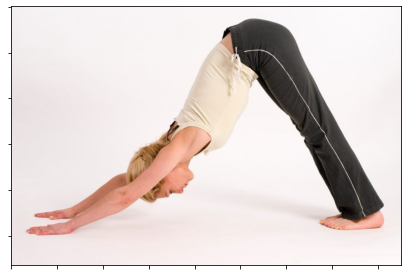

In [32]:
fig, axs = plt.subplots(1, 1, figsize=(7, 7))
axs.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs.set_xticklabels([])
axs.set_yticklabels([])
plt.show()

## Plot Examples
We plot now 5 images of every category.

## Downdog

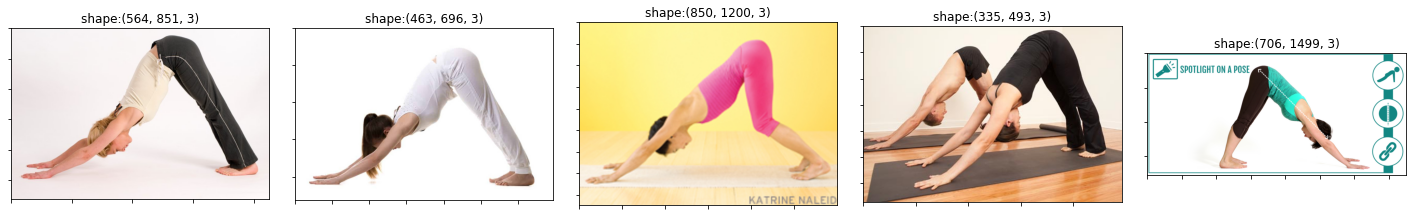

In [33]:
plot_examples(category = 'downdog')

## Tree

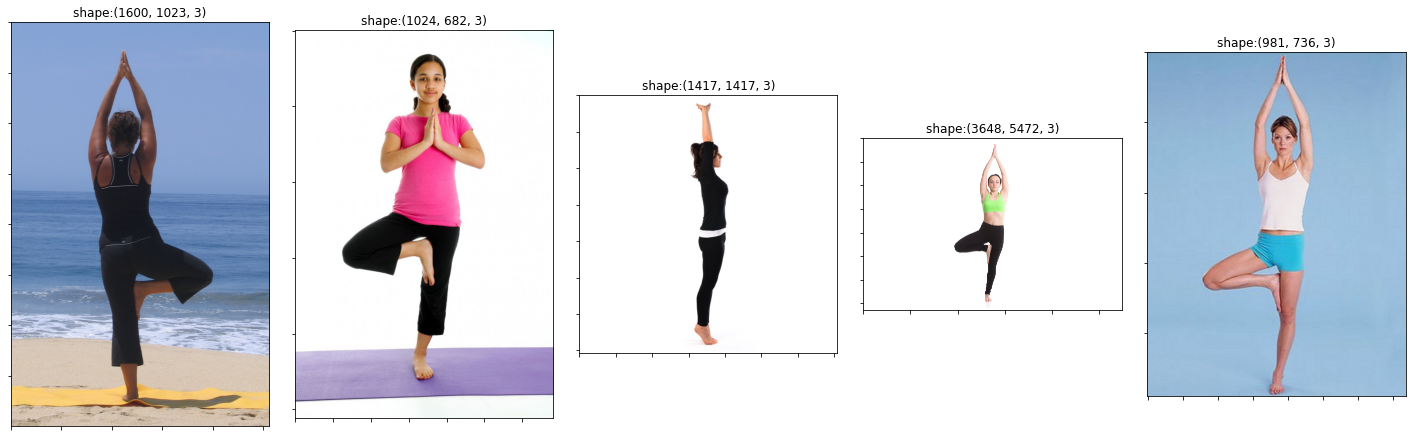

In [34]:
plot_examples(category = 'tree')

## Plank

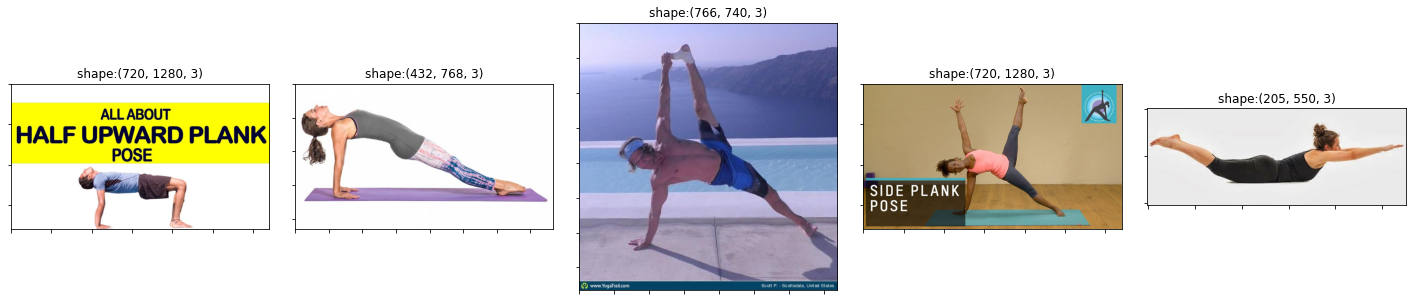

In [35]:
plot_examples(category = 'plank')

## Warrior2

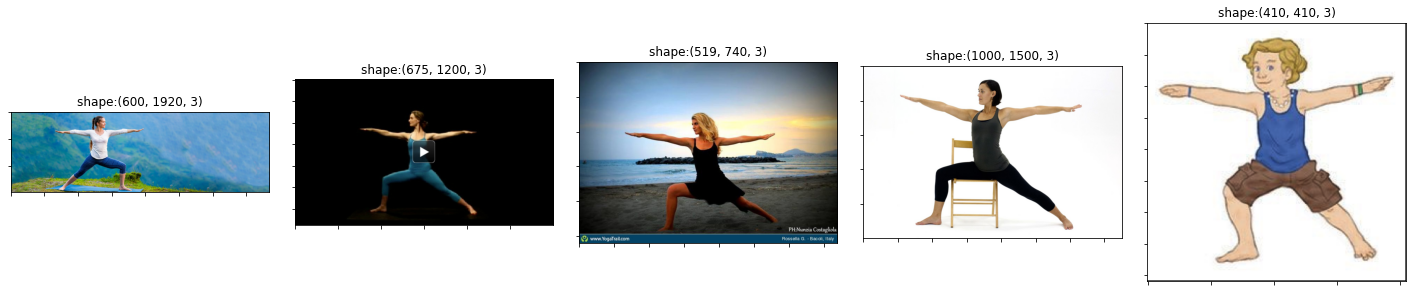

In [36]:
plot_examples(category = 'warrior2')

## Goddess

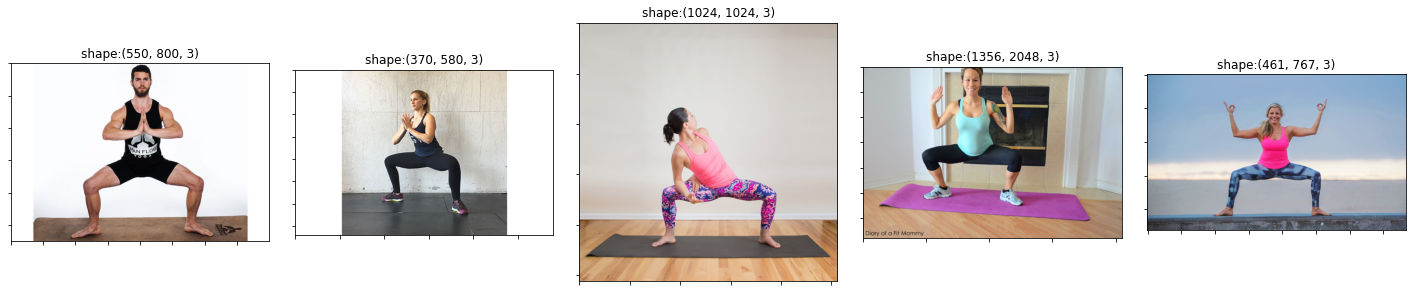

In [37]:
plot_examples(category = 'goddess')

## Exploratory Data Analysis
As we can see on the example plots, the images doesn't have the same size and or format. Some of them are quadric, in landscape or in portrait format. Later we have to define a neural network based on a fixed image size and format. Therefore we have to resize all images. The question is how to do this?

We will use a quadratic format for our neural network. Now the question is how to deal with non-quadratic images.

Should we:

- stretch or compress the images?
- crop the images?
- fill up the images?

Of course this decision might have an impact of the prediction score.

Let us focus on the following example:


In [38]:
image = cv2.imread(path + '/TRAIN/' + 'downdog/' + os.listdir(path + '/TRAIN/' + 'downdog/')[4])
#image = cv2.imread(path + '/TRAIN/' + 'tree/' + os.listdir(path + '/TRAIN/' + 'tree/')[0])

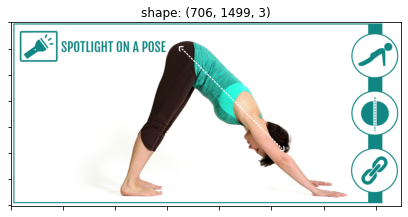

In [39]:
fig, axs = plt.subplots(1, 1, figsize=(7, 7))
axs.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs.set_xticklabels([])
axs.set_yticklabels([])
axs.set_title('shape: ' + str(image.shape))
plt.show()

In [40]:
image_size = 345

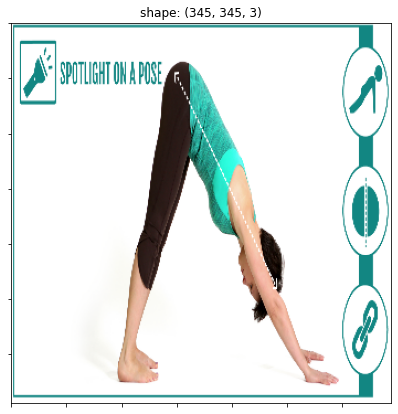

In [41]:
image_compress = cv2.resize(image, (image_size, image_size))
fig, axs = plt.subplots(1, 1, figsize=(7, 7))
axs.imshow(cv2.cvtColor(image_compress, cv2.COLOR_BGR2RGB))
axs.set_xticklabels([])
axs.set_yticklabels([])
axs.set_title('shape: ' + str(image_compress.shape))
plt.show()

In [42]:
# Crop Image
mid_row = int(image.shape[0]/2)
mid_col = int(image.shape[1]/2)
if image.shape[0]>image.shape[1]:
    image_cropped = image[mid_row-mid_col:mid_row+mid_col,
                          0:image.shape[1]]
else:
    image_cropped = image[0:image.shape[0],
                          mid_col-mid_row:mid_col+mid_row]
    
# Rescale Image
image_rescale = cv2.resize(image_cropped,
                            dsize=(image_size, image_size),
                            interpolation=cv2.INTER_AREA)

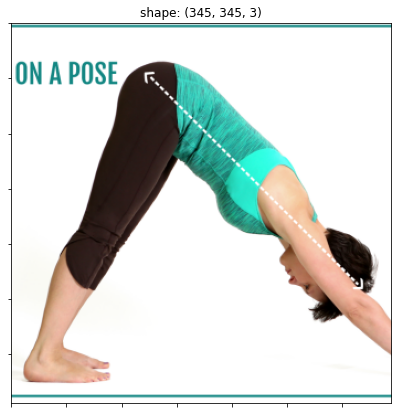

In [43]:
fig, axs = plt.subplots(1, 1, figsize=(7, 7))
axs.imshow(cv2.cvtColor(image_rescale, cv2.COLOR_BGR2RGB))
axs.set_xticklabels([])
axs.set_yticklabels([])
axs.set_title('shape: ' + str(image_rescale.shape))
plt.show()

In [44]:
if image.shape[0]>image.shape[1]:
    image_filled = 255*np.ones([image.shape[0], image.shape[0], image.shape[2]], np.uint8)
    start_col = int((image.shape[0]-image.shape[1])/2)
    image_filled[:,start_col:start_col+image.shape[1]] = image
else:
    image_filled = 255*np.ones([image.shape[1], image.shape[1], image.shape[2]], np.uint8)
    start_row = int((image.shape[1]-image.shape[0])/2)
    image_filled[start_row:start_row+image.shape[0]] = image

image_rescale = cv2.resize(image_filled,
                            dsize=(image_size, image_size),
                            interpolation=cv2.INTER_AREA)

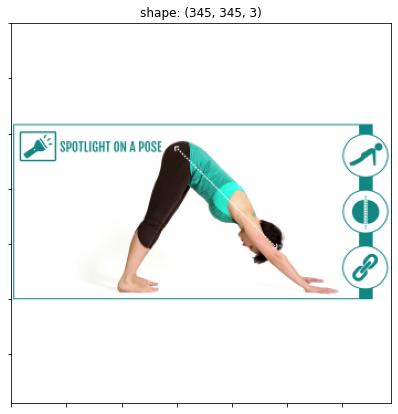

In [45]:
fig, axs = plt.subplots(1, 1, figsize=(7, 7))
axs.imshow(cv2.cvtColor(image_rescale, cv2.COLOR_BGR2RGB))
axs.set_xticklabels([])
axs.set_yticklabels([])
axs.set_title('shape: ' + str(image_rescale.shape))
plt.show()

## Prepare Data
We create a list with all train and test data for a more comfortable processing.

In [46]:
train_data = pd.DataFrame()
test_data = pd.DataFrame()

for category in categories:
    # Train Data
    temp = pd.DataFrame(os.listdir(path + '/TRAIN/' + category + '/'), columns=['image'])
    temp['category'] = category
    train_data = pd.concat([train_data, temp], ignore_index=True)
    
    # Test Data
    temp = pd.DataFrame(os.listdir(path + '/TEST/' + category + '/'), columns=['image'])
    temp['category'] = category
    test_data = pd.concat([test_data, temp], ignore_index=True)

#### The TRAIN data is not evently distributed

In [47]:
train_data['category'].value_counts()

plank       266
warrior2    252
downdog     223
goddess     180
tree        160
Name: category, dtype: int64

#### The TEST data is not evently distributed

In [48]:
test_data['category'].value_counts()

plank       115
warrior2    109
downdog      97
goddess      80
tree         69
Name: category, dtype: int64

In [49]:
labels_dict = dict(zip(categories, range(5)))
labels_dict

{'downdog': 0, 'goddess': 1, 'plank': 2, 'tree': 3, 'warrior2': 4}

## Shuffle Data

In [50]:
train_data = train_data.sample(frac = 1)
train_data.index = range(len(train_data))

In [51]:
train_data.head()

,image,category
0,00000154.jpg,goddess
1,00000107.jpg,tree
2,00000221.jpg,warrior2
3,00000217.jpg,downdog
4,00000204.jpg,warrior2


## Data Generator
To load the data on demand we define the data genertor

In [61]:
batch_size = 32
img_size = 256
img_channel = 3
num_classes = 5

In [62]:
class DataGenerator(Sequence):
    def __init__(self, path, list_IDs, labels, batch_size, img_size, img_channel, num_classes):
        self.path = path
        self.list_IDs = list_IDs
        self.labels = labels
        self.batch_size = batch_size
        self.img_size = img_size
        self.img_channel = img_channel
        self.num_classes = num_classes
        self.indexes = np.arange(len(self.list_IDs))
        
    def __len__(self):
        len_ = int(len(self.list_IDs)/self.batch_size)
        if len_*self.batch_size < len(self.list_IDs):
            len_ += 1
        return len_
    
    
    def __getitem__(self, index):
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        list_IDs_temp = [self.list_IDs[k] for k in indexes]
        X, y = self.__data_generation(list_IDs_temp)
        return X, y
            
    
    def __data_generation(self, list_IDs_temp):
        X = np.zeros((self.batch_size, self.img_size, self.img_size, self.img_channel))
        y = np.zeros((self.batch_size, self.num_classes), dtype=int)
        for i, ID in enumerate(list_IDs_temp):
            row = self.list_IDs[self.list_IDs==ID].index[0]
            img = cv2.imread(self.path+self.labels[row]+'/'+ID)
            # Compress the image
            img = cv2.resize(img, (self.img_size, self.img_size))
            X[i, ] = img/255
            y[i, ] = to_categorical(labels_dict[self.labels[row]], num_classes=self.num_classes)
        return X, y

In [63]:
train_generator = DataGenerator(path + '/TRAIN/', train_data['image'], train_data['category'],
                                batch_size, img_size, img_channel, num_classes)

test_generator = DataGenerator(path + '/TEST/', test_data['image'], test_data['category'],
                               batch_size, img_size, img_channel, num_classes)

## Load Pretrained Model

In [65]:
from tensorflow.keras.applications.resnet import ResNet50
model = ResNet50(weights='imagenet')
model_notop = ResNet50(weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 8s 0us/step


In [67]:
weights='./resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
conv_base = ResNet50(weights=weights,
                     include_top=False,
                     input_shape=(img_size, img_size, img_channel))
conv_base.trainable = True

## Define Model

In [68]:
epochs = 25

In [69]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(optimizer = RMSprop(lr=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 8, 8, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               16777344  
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 40,365,701
Trainable params: 40,312,581
Non-trainable params: 53,120
_________________________________________________________________


In [70]:
history = model.fit_generator(generator=train_generator,
                              validation_data=test_generator,
                              epochs = epochs)

Epoch 1/25
34/34 [==============================] - 47s 973ms/step - loss: 0.9389 - accuracy: 0.7105 - val_loss: 1.2053 - val_accuracy: 0.6458
Epoch 2/25
34/34 [==============================] - 29s 857ms/step - loss: 0.0661 - accuracy: 0.9779 - val_loss: 1.3853 - val_accuracy: 0.5708
Epoch 3/25
34/34 [==============================] - 29s 839ms/step - loss: 0.0122 - accuracy: 0.9945 - val_loss: 2.2711 - val_accuracy: 0.0938
Epoch 4/25
34/34 [==============================] - 29s 847ms/step - loss: 0.0059 - accuracy: 0.9917 - val_loss: 2.1510 - val_accuracy: 0.1417
Epoch 5/25
34/34 [==============================] - 29s 846ms/step - loss: 0.0032 - accuracy: 0.9963 - val_loss: 2.7688 - val_accuracy: 0.0750
Epoch 6/25
34/34 [==============================] - 29s 844ms/step - loss: 0.0020 - accuracy: 0.9926 - val_loss: 2.8299 - val_accuracy: 0.0771
Epoch 7/25
34/34 [==============================] - 29s 837ms/step - loss: 4.5657e-04 - accuracy: 0.9936 - val_loss: 2.7055 - val_accuracy: 0.

## Analyze Training

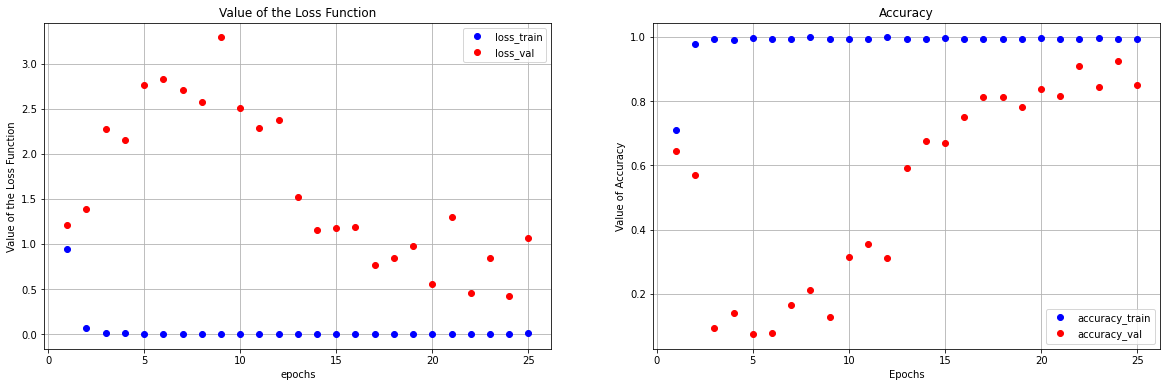

In [71]:
fig, axs = plt.subplots(1, 2, figsize = (20, 6))
fig.subplots_adjust(hspace = .2, wspace = .2)
axs = axs.ravel()
loss = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1, len(loss) + 1)
axs[0].plot(epochs, loss, 'bo', label = 'loss_train')
axs[0].plot(epochs, loss_val, 'ro', label = 'loss_val')
axs[0].set_title('Value of the Loss Function')
axs[0].set_xlabel('epochs')
axs[0].set_ylabel('Value of the Loss Function')
axs[0].legend()
axs[0].grid()
acc = history.history['accuracy']
acc_val = history.history['val_accuracy']
axs[1].plot(epochs, acc, 'bo', label = 'accuracy_train')
axs[1].plot(epochs, acc_val, 'ro', label = 'accuracy_val')
axs[1].set_title('Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Value of Accuracy')
axs[1].legend()
axs[1].grid()
plt.show()

## Predict Test

In [72]:
predict = model.predict_generator(test_generator, verbose=1)

15/15 [==============================] - 10s 606ms/step


In [73]:
test_data['predict'] = predict.argmax(axis=1)[0:len(test_data)]
dict_rename = {v : k for k, v in labels_dict.items()}
test_data = test_data.replace({"predict": dict_rename})

In [74]:
test_data['correct'] = np.where(test_data['category']==test_data['predict'], 1, 0)

In [75]:
100*test_data['correct'].sum()/len(test_data)

33.191489361702125

In [76]:
test_data[test_data['correct']==0]['predict'].value_counts()

downdog     196
goddess      63
plank        49
warrior2      5
tree          1
Name: predict, dtype: int64